In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

In [3]:
#Changement de répertoire de référence pour le chargement des dataset si besoin
Enquete=pd.read_excel('C:/Users/Shelley Ternon/OneDrive/Bureau/M2/PROJET/team-bonheur-master/Enquête-sur-le-bonheur-3.xlsx')

### Nettoyage du jeu de données

In [4]:
Enquete.dtypes

Timestamp                                                                                               datetime64[ns]
Quel est votre sexe ?                                                                                           object
Quel est votre âge ? (Ex : 30 pour 30 ans)                                                                       int64
Dans quel département habitez-vous ? (Ex : 38 pour l'Isère / 0 si hors France)                                   int64
Etes vous heureux ?                                                                                              int64
Accordez-vous de l'importance à ... ? (Cochez si oui)                                                           object
Vous épanouissez-vous dans votre travail ?                                                                     float64
Accordez-vous de l'importance à l'argent ?                                                                       int64
Etes-vous plutôt ville ou nature ?              

SyntaxError: invalid syntax (<ipython-input-119-608477390768>, line 1)

#### Analyses statistiques

- Etes vous heureux ?

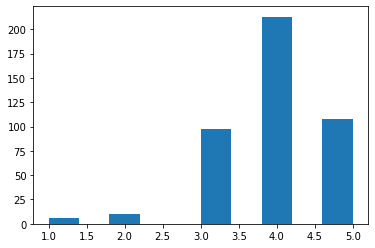

In [5]:
plt.hist(Enquete['Etes vous heureux ?'])
plt.show()

- Vous épanouissez-vous dans votre travail ? 

40000.0    170
30000.0    113
50000.0     78
20000.0     40
10000.0     25
Name: Vous épanouissez-vous dans votre travail ?, dtype: int64


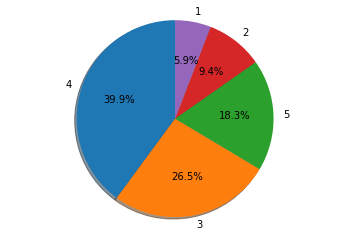

In [105]:
name = ['4', '3', '5', '2','1']
data = Enquete.iloc[:,6]

counts = data.value_counts()

plt.pie(counts,labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

- Etes-vous plutôt ville ou nature ?

In [115]:
data=Enquete["Etes-vous plutôt ville ou nature ?"]

counts = data.value_counts(bins=3)
counts


(3.667, 5.0]      248
(2.333, 3.667]    127
(0.995, 2.333]     60
Name: Etes-vous plutôt ville ou nature ?, dtype: int64

#### Analyses textuelles

In [6]:
import string # pour charger une librairie de ponctuation (string.punctuation)
import unicodedata # pour remplacer tous les caractères accentués
corpus = Enquete.iloc[:,19]
for i in range(len(corpus)) :
    tmp = str(corpus[i])
    tmp = tmp.lower() # Supprimer les majuscules
    tmp = tmp.replace("'"," ") # Remplacer apostrophe par une espace
    tmp = tmp.replace("\n"," ") # Supprimer les retours chariot
    tmp = tmp.translate(str.maketrans("","", string.punctuation)) # Supprimer la ponctuation
    tmp = tmp.encode('utf-8').decode('utf-8') # Éliminations des caractères spéciaux et accentués
    tmp = unicodedata.normalize('NFD', tmp).encode('ascii', 'ignore')   
    tmp = str(tmp)[2:-1] # Supprimer le préfixe b' qui apparaît lors de la conversion
    corpus[i] = tmp
print(corpus)

0      etre dans un bon etat d esprit sans angoisse e...
1      pour moi c est etre satisfait de soimeme de so...
2      etre bien dans sa peau dans sa vie et etre ent...
3      accomplir son objectif de vie faire ce qui nou...
4                              avoir la paix interieure 
                             ...                        
430    se sentir a sa place au niveau familial profes...
431    ma reponse vaut 1 million  desole trop d obser...
432    avoir le sourire et faire ce que je veux quand...
433                                        etre epanoui 
434    se sentir bien comble de choses essentielles l...
Name: Qu'est-ce qu'être heureux selon vous ?, Length: 435, dtype: object


C:\Users\Shelley Ternon\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


- Qu'est-ce qu'être heureux selon vous ?  

In [10]:
import spacy
sp = spacy.load("fr")

train_tokens = ''
doc =  corpus
doc = doc.apply(lambda x:
                sp(x))
train_tokens = doc

def clean_txt(tokens):
    return [token.lemma_ for token in tokens if (len(token.lemma_)>2 and not token.is_stop and not token.is_punct and not token.is_digit)]

train_clean = train_tokens.apply(clean_txt)
print(train_clean)

0          [bon, etat, esprit, angoisse, sourire, levre]
1      [satisfait, soimeme, entourage, possede, confi...
2                             [peau, vie, entoure, aime]
3               [accomplir, objectif, vie, faire, coeur]
4                                      [paix, interieur]
                             ...                        
430    [sentir, place, niveau, familial, professionne...
431    [reponse, valoir, million, desole, observation...
432                   [sourire, faire, vouloir, vouloir]
433                                            [epanoui]
434    [sentir, comble, chose, essentiel, amour, proc...
Name: Qu'est-ce qu'être heureux selon vous ?, Length: 435, dtype: object


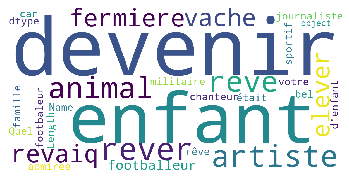

In [123]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=500, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(train_clean) 

- Quel était votre rêve d'enfant ? 

In [116]:
import string # pour charger une librairie de ponctuation (string.punctuation)
import unicodedata # pour remplacer tous les caractères accentués
corpus = Enquete.iloc[:,14]
for i in range(len(corpus)) :
    tmp = str(corpus[i])
    tmp = tmp.lower() # Supprimer les majuscules
    tmp = tmp.replace("'"," ") # Remplacer apostrophe par une espace
    tmp = tmp.replace("\n"," ") # Supprimer les retours chariot
    tmp = tmp.translate(str.maketrans("","", string.punctuation)) # Supprimer la ponctuation
    tmp = tmp.encode('utf-8').decode('utf-8') # Éliminations des caractères spéciaux et accentués
    tmp = unicodedata.normalize('NFD', tmp).encode('ascii', 'ignore')   
    tmp = str(tmp)[2:-1] # Supprimer le préfixe b' qui apparaît lors de la conversion
    corpus[i] = tmp
print(corpus)

C:\Users\Shelley Ternon\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0      je revais d etre artiste et d avoir plein d an...
1            je n avais pas de reve quand j etais enfant
2      je revaiq de devenir fermiere et d elever des ...
3                                      avoir des enfants
4                                   devenir footballeur 
                             ...                        
430                          devenir journaliste sportif
431                                           footbaleur
432                  etre une chanteuse admiree de tous 
433                                                  nsp
434    avoir une belle famille 5 enfants et devenir m...
Name: Quel était votre rêve d'enfant ?, Length: 435, dtype: object


In [120]:
import spacy
sp = spacy.load("fr")
sp.vocab["nsp"].is_stop= True

train_tokens = ''
doc =  corpus
doc = doc.apply(lambda x:
                sp(x))
train_tokens = doc

def clean_txt(tokens):
    return [token.lemma_ for token in tokens if (len(token.lemma_)>2 and not token.is_stop and not token.is_punct and not token.is_digit)]

train_clean = train_tokens.apply(clean_txt)
print(train_clean)

0                               [rever, artiste, animal]
1                                         [reve, enfant]
2             [revaiq, devenir, fermiere, elever, vache]
3                                               [enfant]
4                                 [devenir, footballeur]
                             ...                        
430                      [devenir, journaliste, sportif]
431                                         [footbaleur]
432                                  [chanteur, admiree]
433                                                   []
434    [bel, famille, enfant, devenir, militaire, car...
Name: Quel était votre rêve d'enfant ?, Length: 435, dtype: object


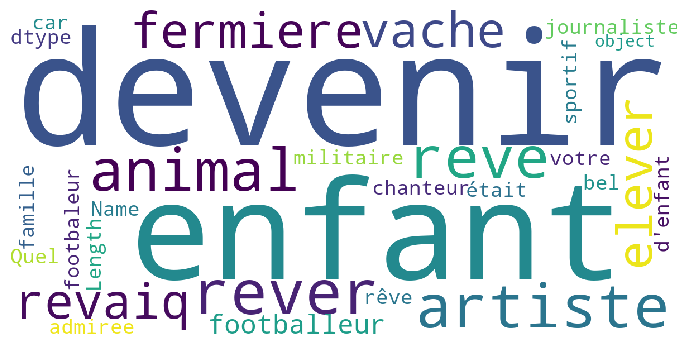

In [124]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=500, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(train_clean) 